# i. Perkenalan

=======================================================

Graded Challenge 7

Nama : Jeni Kasturi

Batch : FTDS_BSD_2

Memprediksi kisaran usia berdasarkan bentuk wajah apakah usianya termasuk antara 18-60 tahun dari database [kaggle]('https://www.kaggle.com/datasets/trainingdatapro/age-detection-human-faces-18-60-years?select=test')

=====================================================

- **Latar Belakang :**

    Dalam era digital, teknologi pengenalan wajah dan estimasi usia telah menjadi topik yang menarik perhatian, terutama dalam aplikasi seperti keamanan, pemasaran, dan platform media sosial. Penggunaan teknologi ini memungkinkan untuk mengidentifikasi usia seseorang dari gambar wajah yang diperoleh.

- **Problem Statement :**

    Dalam kasus ini, terdapat dataset yang terdiri dari 150 gambar wajah manusia yang sudah diklasifikasikan ke dalam lima kategori usia: 18-20, 21-30, 31-40, 41-50, dan 51-60. Tujuan utama adalah membangun model pembelajaran mesin yang dapat memprediksi usia seseorang berdasarkan gambar wajah yang diberikan.

- **Objective :**

    - Pengumpulan Data: Mengumpulkan dataset gambar wajah manusia yang sudah diklasifikasikan ke dalam kelompok usia yang berbeda.

    - Preprocessing Data: Melakukan pra-pemrosesan data untuk memastikan konsistensi, kualitas, dan kesesuaian data untuk pemodelan.

    - Pemodelan: Membangun model pembelajaran mesin (seperti neural network) yang mampu belajar dari dataset gambar wajah untuk memprediksi usia seseorang.

    - Evaluasi Model: Mengevaluasi kinerja model untuk memastikan akurasi dan generalisasi yang baik terhadap data yang belum pernah dilihat sebelumnya.

    - Pengembangan Model: Jika perlu, melakukan fine-tuning model untuk meningkatkan kinerja prediksi usia dari gambar wajah.

    - Implementasi Model: Mengintegrasikan model ke dalam aplikasi atau sistem yang memungkinkan untuk melakukan prediksi usia dari gambar wajah secara real-time atau batch.

  Tujuan akhir dari proyek ini adalah memiliki model yang mampu memprediksi usia dari gambar wajah manusia dengan tingkat akurasi yang tinggi, yang dapat membantu berbagai macam aplikasi di berbagai industri dan platform teknologi.

---

# ii. Import Libraries

Import semua library yang dibutuhkan dalam projek.

In [ ]:
# acces folder
import os
import glob
import random

# data loading
import numpy as np
import pandas as pd
import cv2

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Models
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input
from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
import warnings
import pdb

# transfer learning
import tensorflow_hub as hub
warnings.filterwarnings('ignore')

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
# connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Konek ke akun Google Drive agar bisa menganalisa datanya.

---

# iii. Data Loading

Pada bagian data loading ini kita akan memuat dan menampilkan dataset yang berisikan banyak gambar dan meloading data menggunakan `Kaggle API`.

In [ ]:
# create kaggle directory
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle

In [ ]:
!chmod 600 /content/kaggle.json ~/.kaggle

chmod: cannot access '/content/kaggle.json': No such file or directory


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d trainingdatapro/age-detection-human-faces-18-60-years

age-detection-human-faces-18-60-years.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q /content/age-detection-human-faces-18-60-years.zip -d images

replace images/age_detection.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Buatlah variabel untuk path agar bisa mendapatkan informasi tentang isi dari folder tersebut, seperti file apa saja yang ada di dalamnya

In [ ]:
# create variables for path
main_path= '/content/images'
os.listdir(main_path)

['train', 'age_detection.csv', 'test']

Buatlah variable untuk train dan test untuk dapat dengan mudah merujuk ke direktori train dan test saat memuat data, melakukan preprocessing, atau melatih model pada struktur dataset yang terorganisir.

In [ ]:
# create variable for train and test directory
train_dir = os.path.join(main_path, 'train')
test_dir = os.path.join(main_path, 'test')
print(train_dir)
print(test_dir)

/content/images/train
/content/images/test


In [ ]:
# create variables train, test each for each class

#train
train_18to20 = len(os.listdir(os.path.join(train_dir, '18-20')))
train_21to30 = len(os.listdir(os.path.join(train_dir, '21-30')))
train_31to40 = len(os.listdir(os.path.join(train_dir, '31-40')))
train_41to50 = len(os.listdir(os.path.join(train_dir, '41-50')))
train_51to60 = len(os.listdir(os.path.join(train_dir, '51-60')))


#test
test_18to20 = len(os.listdir(os.path.join(test_dir, '18-20')))
test_21to30 = len(os.listdir(os.path.join(test_dir, '21-30')))
test_31to40 = len(os.listdir(os.path.join(test_dir, '31-40')))
test_41to50 = len(os.listdir(os.path.join(test_dir, '41-50')))
test_51to60 = len(os.listdir(os.path.join(test_dir, '51-60')))


# data count
print('----------------')
print('Train Dataset')
print('----------------')
print('Count of train_18to20 : ', train_18to20)
print('Count of train_21to30 : ', train_21to30)
print('Count of train_31to40 : ', train_31to40)
print('Count of train_41to50 : ', train_41to50)
print('Count of train_51to60 : ', train_51to60)
print(' ')
print('----------------')
print('Test Dataset')
print('----------------')
print('Count of test_18to20 : ', test_18to20)
print('Count of test_21to30 : ', test_21to30)
print('Count of test_31to40 : ', test_31to40)
print('Count of test_41to50 : ', test_41to50)
print('Count of test_51to60 : ', test_51to60)

----------------
Train Dataset
----------------
Count of train_18to20 :  25
Count of train_21to30 :  25
Count of train_31to40 :  25
Count of train_41to50 :  25
Count of train_51to60 :  25
 
----------------
Test Dataset
----------------
Count of test_18to20 :  5
Count of test_21to30 :  5
Count of test_31to40 :  5
Count of test_41to50 :  5
Count of test_51to60 :  5


Dari syntax diatas berfungsi untuk menghitung jumlah data (jumlah gambar) untuk setiap kelas usia dalam dataset training dan testing. Ini membagi setiap kelas usia menjadi sub-direktori (misalnya: '18-20', '21-30', dst.) di dalam direktori train dan test, dan menghitung berapa banyak gambar yang ada dalam masing-masing sub-direktori.

Membuat variable untuk filepaths dengan menggunakan modul glob untuk membuat daftar filepaths (jalur file) dari gambar-gambar yang ada di setiap sub-direktori kelas usia dalam dataset train dan test.

In [ ]:
# Create a variable from filepaths

#train
train_18to20 = glob.glob(train_dir + '/18-20/*.jpg')
train_21to30 = glob.glob(train_dir + '/21-30/*.jpg')
train_31to40 = glob.glob(train_dir + '/31-40/*.jpg')
train_41to50 = glob.glob(train_dir + '/41-50/*.jpg')
train_51to60 = glob.glob(train_dir + '/51-60/*.jpg')


#test
test_18to20 = glob.glob(test_dir + '/18-20/*.jpg')
test_21to30 = glob.glob(test_dir + '/21-30/*.jpg')
test_31to40 = glob.glob(test_dir + '/31-40/*.jpg')
test_41to50 = glob.glob(test_dir + '/41-50/*.jpg')
test_51to60 = glob.glob(test_dir + '/51-60/*.jpg')

In [ ]:
# Creating dataset train and test

def create_dataframe(list_of_images):
  data=[]
  for image in list_of_images:
    data.append((image, image.split('/')[-2]))

  return pd.DataFrame(data, columns= ['images', 'label'])

train_df = create_dataframe(train_18to20 + train_21to30 + train_31to40 + train_41to50 + train_51to60)
train_df = train_df.sample(frac=1, random_state=7).reset_index(drop=True)

test_df = create_dataframe(test_18to20 + test_21to30 + test_31to40 + test_41to50 + test_51to60)
test_df = test_df.sample(frac=1, random_state=7).reset_index(drop=True)

In [ ]:
# Show shape of sampel from train set
print(train_df.shape)
train_df

(125, 2)


images  label
0    /content/images/train/51-60/16.jpg  51-60
1     /content/images/train/51-60/1.jpg  51-60
2    /content/images/train/41-50/14.jpg  41-50
3    /content/images/train/41-50/22.jpg  41-50
4    /content/images/train/21-30/18.jpg  21-30
..                                  ...    ...
120   /content/images/train/31-40/4.jpg  31-40
121  /content/images/train/51-60/21.jpg  51-60
122   /content/images/train/21-30/1.jpg  21-30
123  /content/images/train/31-40/21.jpg  31-40
124   /content/images/train/21-30/2.jpg  21-30

[125 rows x 2 columns]

Setelah kita pisahkan gambar berdasarkan labelnya, langkah selanjutnya yaitu kita bisa mengolah data kita untuk melatih model.

---

# iv. Exploratory Data Analysis (EDA)

Pada bagian EDA ini kita akan melakukan visualisasi data dan melakukan eksplorasi data menggunakan teknik aritmatika sederhana.

In [ ]:
#function to visualize each class

def visualize_samples_by_label(df, label, num_samples=20):
    samples = df[df['label'] == label]['images'].iloc[:num_samples].tolist()
    num_cols = min(num_samples, 5)
    num_rows = (num_samples - 1) // num_cols + 1
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 2 * num_rows))
    count = 0
    for i in range(num_rows):
        for j in range(num_cols):
            if count < len(samples):
                sample = samples[count]
                img = cv2.imread(sample)
                ax = axes[i, j]
                ax.set_title(sample.split('/')[-1].split('\\')[-1])
                ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                ax.axis('off')
                count += 1
    plt.tight_layout()
    plt.show()

## 1. Usia 18-20

Tampilkan class usia 18-20 untuk kita lihat karakteristiknya.

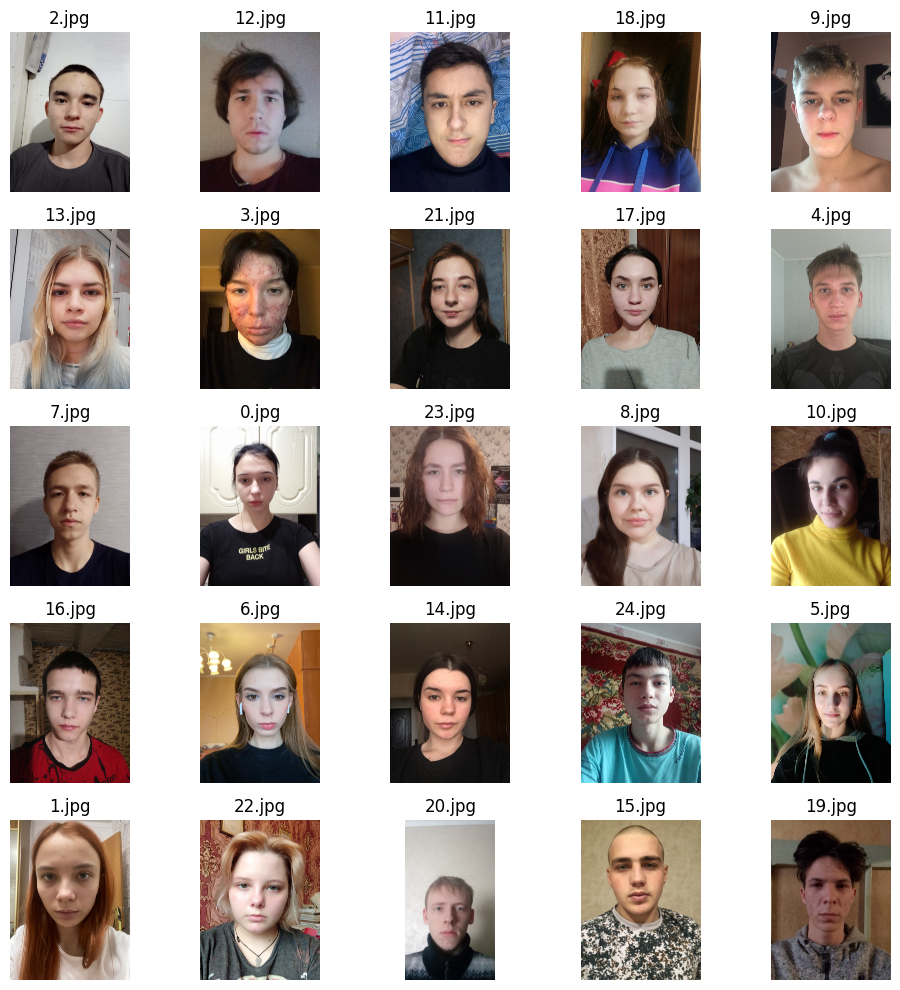

In [ ]:
# visualize 'Bean' class
visualize_samples_by_label(train_df, '18-20', num_samples=25)

**Karakteristik**

wajah terlihat masih muda dan tidak memiliki banyak keriput pada wajahnya

## 2. Usia 21-30

Tampilkan class usia 21-30 untuk kita lihat karakteristiknya.

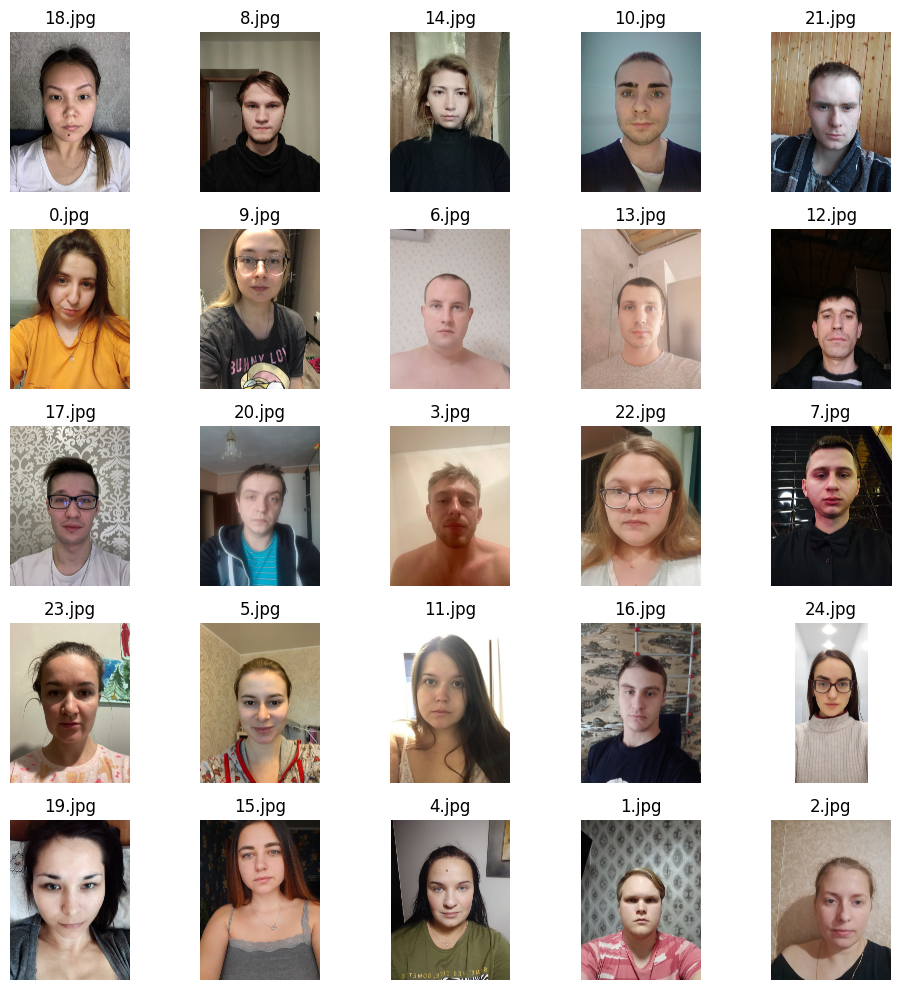

In [ ]:
# visualize 'Bean' class
visualize_samples_by_label(train_df, '21-30', num_samples=25)

**Karakteristik**

wajah terlihat sudah dewasa dan mulai memiliki sedikit keriput/garis halus pada wajahnya

## 3. Usia 31-40

Tampilkan class usia 31-40 untuk kita lihat karakteristiknya.

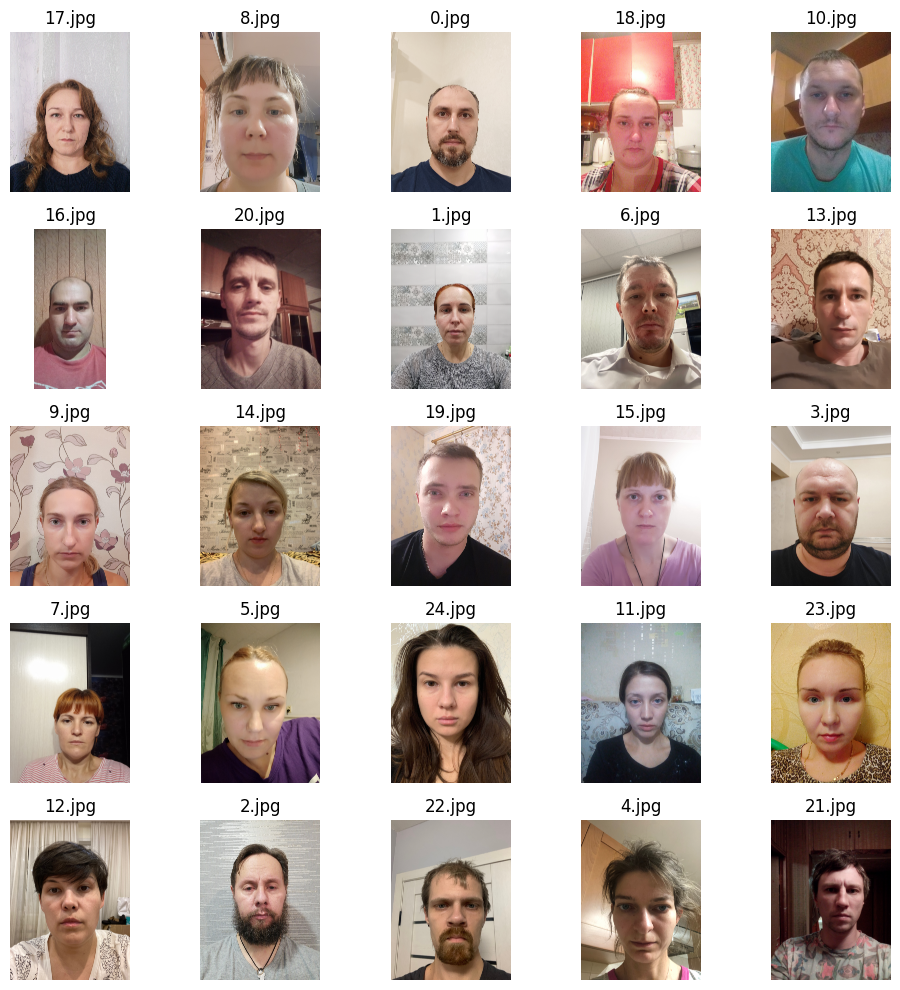

In [ ]:
# visualize 'Bean' class
visualize_samples_by_label(train_df, '31-40', num_samples=25)

**Karakteristik**

wajah terlihat sangat dewasa dan memiliki keriput/garis halus pada area bawah mata dan garis senyum.

## 4. Usia 41-50

Tampilkan class usia 41-50 untuk kita lihat karakteristiknya.

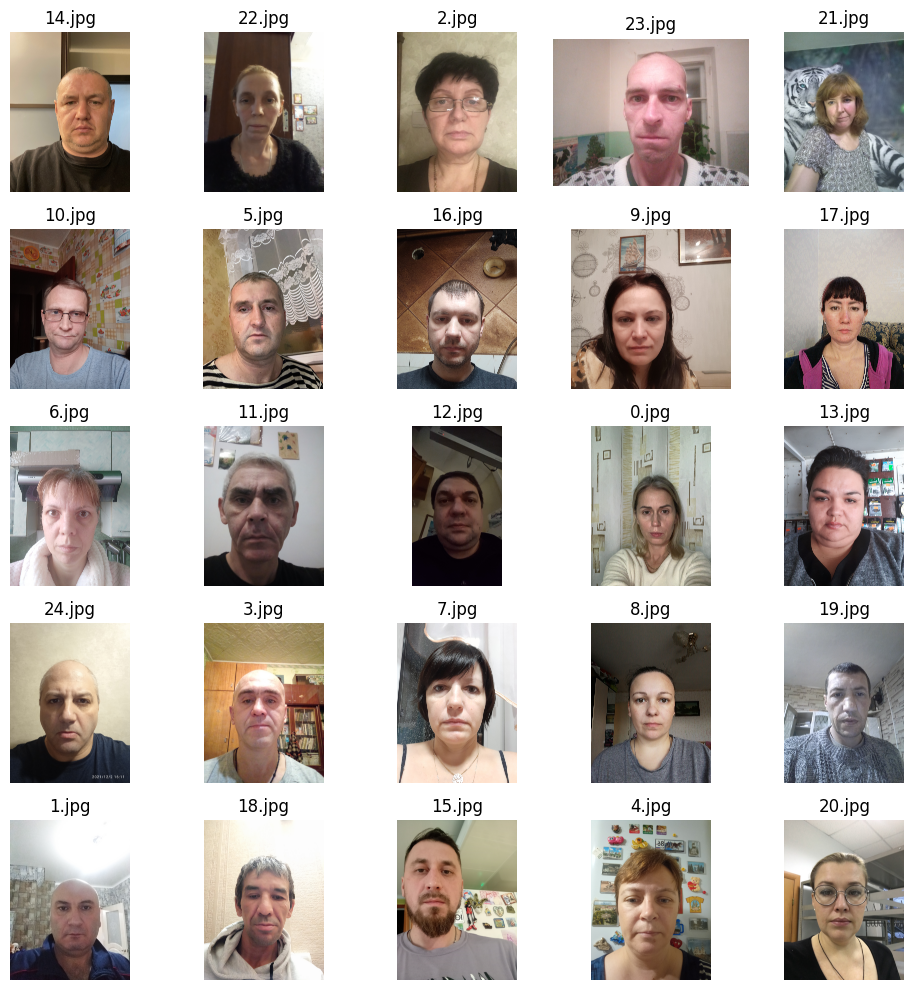

In [ ]:
# visualize 'Bean' class
visualize_samples_by_label(train_df, '41-50', num_samples=25)

**Karakteristik**

wajah terlihat sedikit menua dan memiliki keriput pada area wajahnya

## 5. Usia 51-60

Tampilkan class usia 51-60 untuk kita lihat karakteristiknya.

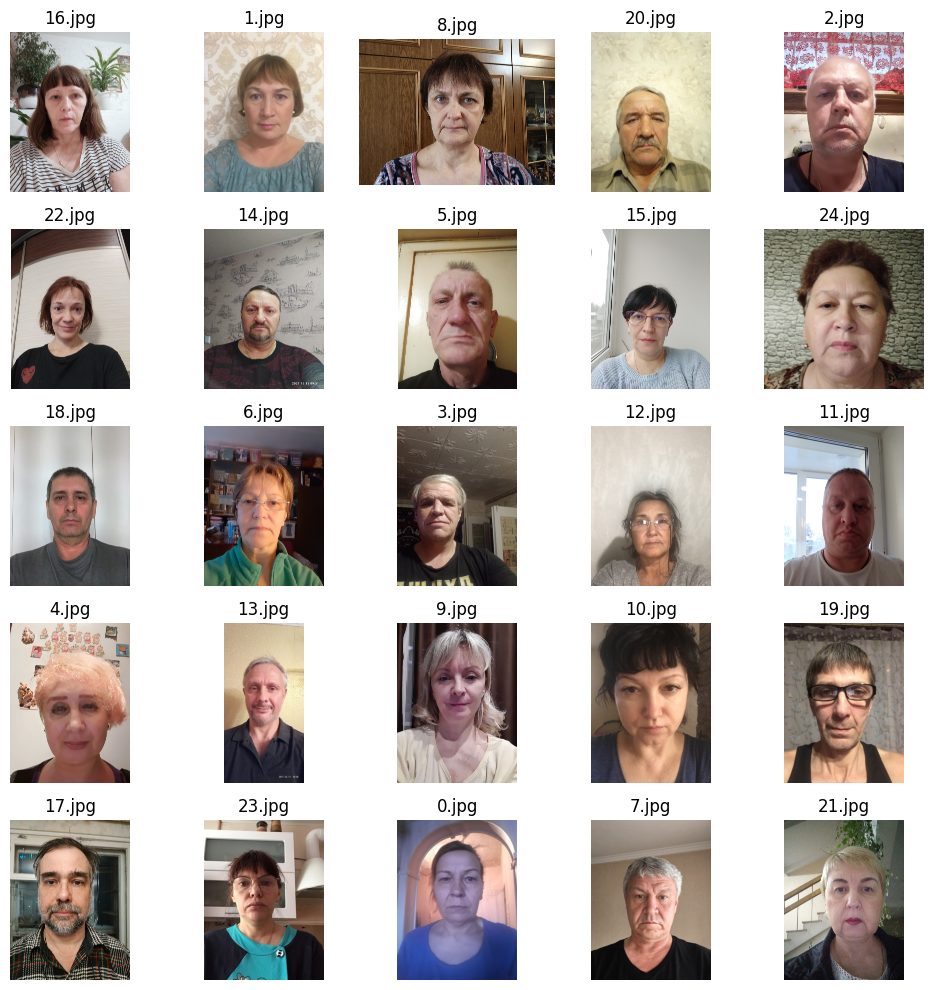

In [ ]:
# visualize 'Bean' class
visualize_samples_by_label(train_df, '51-60', num_samples=25)

**Karakteristik**

wajah terlihat sudah menua dan memiliki banyak keriput pada seluruh area wajahnya

`*Kesimpulan*` : secara keseluruhan karakteristik dari setiap class usia hampir sama dan hanya terdapat sedikit perbedaan pada beberapa bagian area wajah.

---

# v. Feature Engineering

## a. Split between Train-set, Test-set dan Validation

In [ ]:
# Memisahkan antara Train dan Tet menggunakan 'train_test_split()'

train_images, val_images = train_test_split(train_df, test_size=0.3, random_state=7, stratify=train_df[['label']])

# show Data
print('Train size :', train_images.shape)
print('Validation size :', val_images.shape)
print('Test size : ', test_df.shape)

Train size : (87, 2)
Validation size : (38, 2)
Test size :  (25, 2)


Kode di atas bertujuan untuk membagi dataset latihan (train_df) menjadi dua bagian: satu bagian untuk melatih model (train_images) dan satu bagian untuk validasi model (val_images), menggunakan fungsi train_test_split() dari library scikit-learn.

## b. Augmentation

Augmentasi di CNN: Menerapkan transformasi (membalik, memutar, menskalakan, dll.) pada gambar pelatihan guna meningkatkan generalisasi model dan mengurangi overfitting

In [ ]:
# Define setting picture

img_height= 110 # set hight image
img_width= 110  # set width image
seed=7
batch_size= 32
input=[img_height,img_width,3]

In [ ]:
# Augmentation Data

train_datagen = ImageDataGenerator(
                                    rescale= 1./255,        # Garis ini memperkecil nilai piksel gambar ke kisaran 0 hingga 1 dengan membaginya dengan 255.
                                    rotation_range= 0.1,    # Rotasi diterapkan pada gambar dalam kisaran 0,1 radian.
                                    width_shift_range= 0.2, # pergeseran horizontal dapat diterapkan pada gambar dalam kisaran 20% dari total lebar.
                                    shear_range= 0.2,       # Transformasi geser dapat diterapkan pada gambar dalam kisaran 20%.
                                    zoom_range= 0.2,        # Zoom dapat diterapkan pada gambar dalam kisaran 20%. Itu dapat memperbesar atau memperkecil objek di dalam gambar.
                                    horizontal_flip= True,  # Horizontal flips can be applied to the images with a 50% chance. It horizontally mirrors the images.
                                    vertical_flip = True    # Vertical flips can be applied to the images with a 50% chance. It vertically mirrors the images.
                                    )

In [ ]:
# for validation data only use rescale
val_datagen = ImageDataGenerator(rescale=1./255)

# for test data only use rescale
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# train data
ds_train = train_datagen.flow_from_dataframe(
            dataframe=train_images,
            x_col='images',
            y_col='label',
            target_size=(img_height, img_width),
            class_mode='sparse',
            batch_size=batch_size,
            shuffle=False,
            seed=seed)

# validation data
ds_val = val_datagen.flow_from_dataframe(
            dataframe=val_images,
            x_col='images',
            y_col='label',
            target_size=(img_height, img_width),
            class_mode='sparse',
            batch_size=batch_size,
            shuffle=False,
            seed=seed)

# test data
ds_test = test_datagen.flow_from_dataframe(
            dataframe=test_df,
            x_col='images',
            y_col='label',
            target_size=(img_height, img_width),
            class_mode='sparse',
            batch_size=batch_size,
            shuffle=False,
            seed=seed)


Found 87 validated image filenames belonging to 5 classes.
Found 38 validated image filenames belonging to 5 classes.
Found 25 validated image filenames belonging to 5 classes.


Text(0.5, 1.0, 'Original')

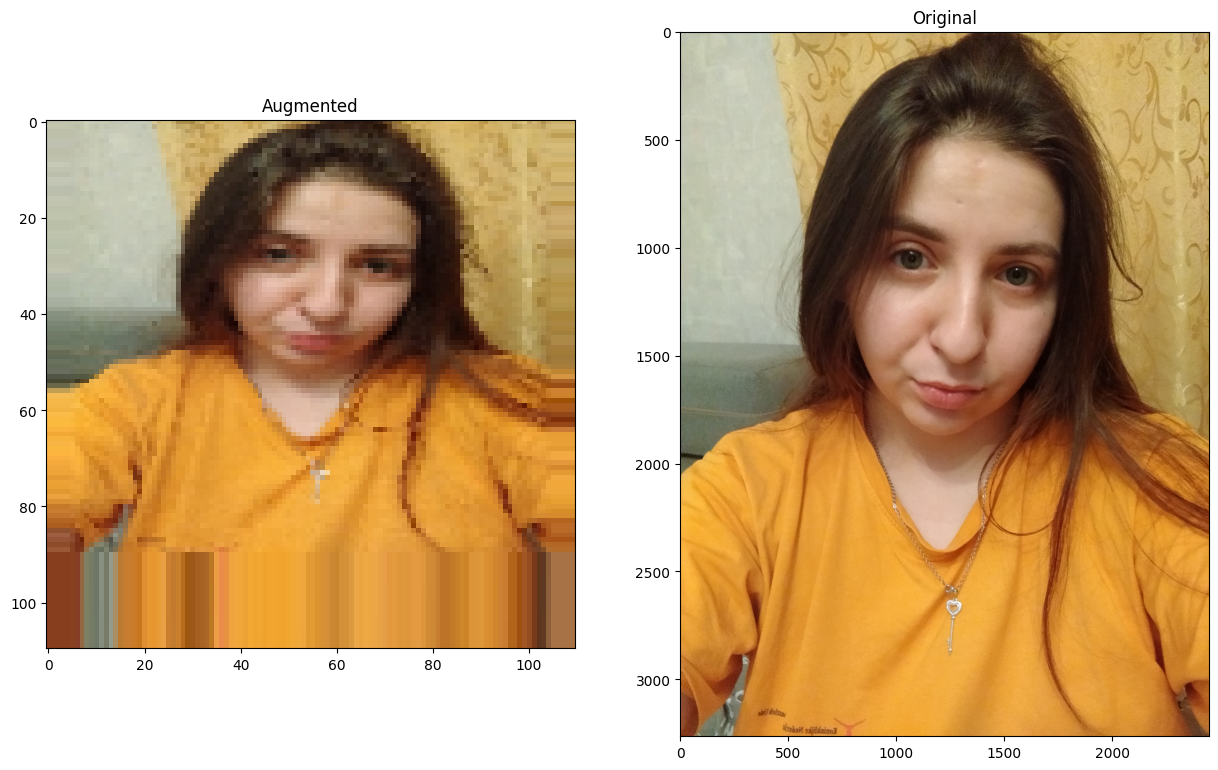

In [ ]:
# Show augmented images
images, labels  = next(ds_train)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
ax[0].imshow(images[0])
ax[0].set_title('Augmented')
original = plt.imread(ds_train.filepaths[ds_train.index_array[batch_size*(ds_train.batch_index-1)]])
ax[1].imshow(original)
ax[1].set_title('Original')

In [ ]:
for image_batch , label_batch in ds_train:
  print(image_batch.shape)
  print(label_batch.shape)
  break

(32, 110, 110, 3)
(32,)


In [ ]:
# key_value for labels binary
key_value = ds_train.class_indices
key_value

{'18-20': 0, '21-30': 1, '31-40': 2, '41-50': 3, '51-60': 4}

Dari dataset kita mengetahui bahwa :

- 0 untuk rentan usia 18-20

- 1 untuk rentan usia 21-30

- 2 untuk rentan usia 31-40

- 3 untuk rentan usia 41-50

- 4 untuk rentan usia 51-60

---

# vi. Model Definition

Pada tahap kali inikita akan membuat callback yang berfungsi untuk membuat callbacks dalam pelatihan model menggunakan Keras.

In [ ]:
# create callbacks

callbacks = [
    EarlyStopping(monitor='val_loss', patience = 3),
    ModelCheckpoint('model.hdf5', monitor='val_loss', save_best_only=True)
]

Pada tahap diatas kita membuat callbacks dengan menggunakan EarlyStopping dan ModelCheckpoint. Kedua callbacks ini sangat berguna saat melatih model untuk menghindari overfitting dan menyimpan model terbaik berdasarkan performa pada dataset validasi. EarlyStopping membantu untuk menghentikan pelatihan jika model mulai overfitting, sedangkan ModelCheckpoint akan menyimpan model terbaik selama proses pelatihan berlangsung.

Langkah selanjutnya kita bikin Clear Session yang berfungsi untuk membersihkan, mengatur seed, dan memastikan tidak ada state sebelumnya yang tersisa

In [ ]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## a. Sequential

Langkah selanjutnya adalah kita membuat model, model ini menggunakan fungsi aktivasi ReLU untuk lapisan-lapisan konvolusi dan terhubung penuh, softmax untuk lapisan output, serta Sparse Categorical Crossentropy sebagai fungsi loss. Ini digunakan untuk klasifikasi gambar pada kelas-kelas yang berbeda.

In [ ]:
# Model Arsitecture
model= Sequential()

#Layer Conv 1
model.add(Conv2D(filters=8, kernel_size=3, activation='relu', input_shape=input))
model.add(MaxPooling2D(pool_size=2, strides=2))

#Layer Conv 2
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding= 'same'))
model.add(MaxPooling2D(pool_size=2, strides=2))

#Layer Conv 3
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding= 'same'))
model.add(MaxPooling2D(pool_size=2, strides=2))

#Flatten
model.add(Flatten())

#Hidden Layer
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))

#Output Layer
model.add(Dense(units=15, activation='softmax'))

# Compile Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 108, 108, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 54, 54, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 54, 54, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 27, 27, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0

## b. Model Improvement

Pada model Improvement kita gunakan Xception dalam Transfer Learning. Karena Xception lebih baik dari ResNet50 dan VGG16 untuk meningkatkan Akurasi.

In [ ]:
# create Xception Model
pretrained_model = tf.keras.applications.Xception(include_top=False,
                                                  input_shape=input,pooling='avg')
pretrained_model.trainable = False

In [ ]:
# Model Definition
model_tf= Sequential()
model_tf.add(pretrained_model) # add Xception for Transfer Learning

#fully connected layer
model_tf.add(Flatten())
model_tf.add(Dense(32, activation='relu')),
model_tf.add(Dense(units=15,activation='softmax'))

model_tf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_tf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 32)                65568     
                                                                 
 dense_5 (Dense)             (None, 15)                495       
                                                                 
Total params: 20927543 (79.83 MB)
Trainable params: 66063 (258.06 KB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


Dari hasil diatas dapat kita lihat fungsi modelnya yaitu mencetak ringkasan dari arsitektur model yang telah dibuat, menunjukkan jumlah total parameter, parameter yang dapat diubah (trainable), dan parameter yang tidak dapat diubah (non-trainable) dari model ini. Total parameter mencapai 20.9 juta, namun hanya sebagian kecil yang dapat dioptimalkan selama pelatihan (66 ribu). Ini karena mayoritas parameter sudah tersedia dari Xception yang telah dilatih sebelumnya.

---

# vii. Model Training

## a. Sequential

In [ ]:
# Training Based Model
%%time
history= model.fit(ds_train, batch_size= batch_size,
                    epochs= 30, validation_data= ds_val,
                    callbacks= callbacks)

Epoch 1/30
3/3 [==============================] - 18s 3s/step - loss: 2.7077 - accuracy: 0.0000e+00 - val_loss: 2.7013 - val_accuracy: 0.1842
Epoch 2/30
3/3 [==============================] - 11s 5s/step - loss: 2.6987 - accuracy: 0.2069 - val_loss: 2.6900 - val_accuracy: 0.1842
Epoch 3/30
3/3 [==============================] - 11s 5s/step - loss: 2.6854 - accuracy: 0.1724 - val_loss: 2.6758 - val_accuracy: 0.1579
Epoch 4/30
3/3 [==============================] - 11s 5s/step - loss: 2.6634 - accuracy: 0.2069 - val_loss: 2.6522 - val_accuracy: 0.1842
Epoch 5/30
3/3 [==============================] - 11s 5s/step - loss: 2.6379 - accuracy: 0.2069 - val_loss: 2.6438 - val_accuracy: 0.1842
Epoch 6/30
3/3 [==============================] - 10s 4s/step - loss: 2.6125 - accuracy: 0.2069 - val_loss: 2.6322 - val_accuracy: 0.1842
Epoch 7/30
3/3 [==============================] - 11s 5s/step - loss: 2.5886 - accuracy: 0.2069 - val_loss: 2.6016 - val_accuracy: 0.1842
Epoch 8/30
3/3 [==============

Dari hasil diatas kesimpulannya adalah model yang dibangun mungkin memerlukan penyesuaian lebih lanjut pada arsitektur atau hyperparameter, karena performa yang didapat masih belum optimal dengan nilai akurasi yang rendah pada dataset pelatihan dan validasi.

## b. Improvement

In [ ]:
# Training Improvement Model
%%time
history4= model_tf.fit(ds_train, batch_size= batch_size,
                           epochs= 30, validation_data= ds_val,
                           callbacks= callbacks)

Epoch 1/30
3/3 [==============================] - 27s 6s/step - loss: 2.5644 - accuracy: 0.1264 - val_loss: 2.2534 - val_accuracy: 0.2632
Epoch 2/30
3/3 [==============================] - 12s 5s/step - loss: 2.0734 - accuracy: 0.2529 - val_loss: 2.0857 - val_accuracy: 0.3158
Epoch 3/30
3/3 [==============================] - 9s 4s/step - loss: 1.8680 - accuracy: 0.2874 - val_loss: 1.9650 - val_accuracy: 0.2368
Epoch 4/30
3/3 [==============================] - 12s 5s/step - loss: 1.5594 - accuracy: 0.3793 - val_loss: 1.8168 - val_accuracy: 0.1842
Epoch 5/30
3/3 [==============================] - 9s 4s/step - loss: 1.4960 - accuracy: 0.3793 - val_loss: 1.7013 - val_accuracy: 0.2368
Epoch 6/30
3/3 [==============================] - 12s 5s/step - loss: 1.4326 - accuracy: 0.3678 - val_loss: 1.6684 - val_accuracy: 0.2632
Epoch 7/30
3/3 [==============================] - 13s 6s/step - loss: 1.2459 - accuracy: 0.4828 - val_loss: 1.6490 - val_accuracy: 0.3421
Epoch 8/30
3/3 [====================

Dari hasil diatas kesimpulannya, peningkatan model yang dilakukan menghasilkan performa yang lebih baik, terutama dalam hal akurasi pada dataset validasi yang naik secara signifikan dari model sebelumnya. Namun, masih mungkin melakukan penyesuaian lebih lanjut untuk meningkatkan performa model lebih jauh.

---

# viii. Model Evaluation

Pada model evaluation ini kita akan melihat akurasi dari pelatihan model.

## a. Sequential

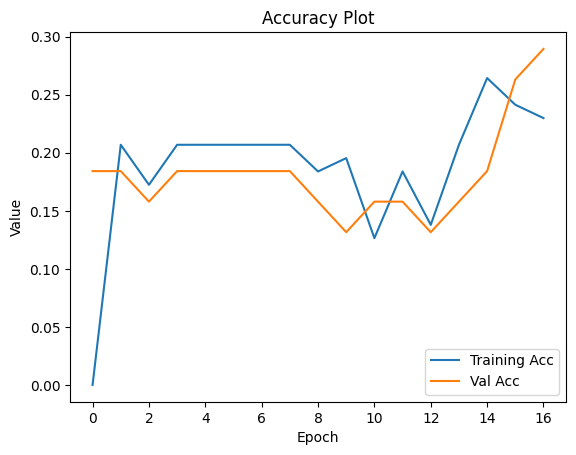

In [ ]:
# plot result Based Model

plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

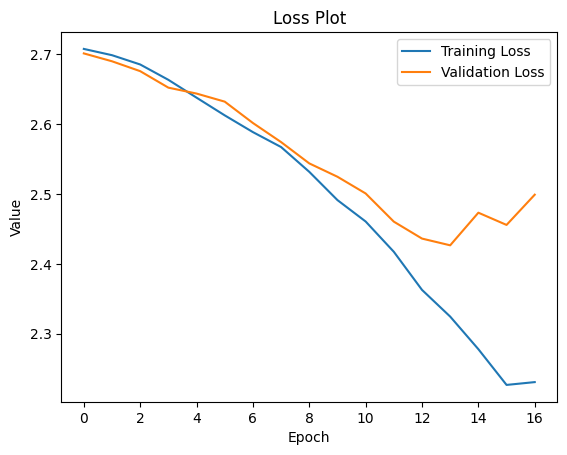

In [ ]:
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()


Dari hasil plot diatas dapat kita simpulkan bahwa data termasuk overvit.

In [ ]:
# result Loss and Accuracy
test_results = model.evaluate(ds_test, verbose=0)
print(f'Test Loss     : {test_results[0]:.4f}')
print(f'Test Accuracy : {test_results[1]:.4f}')

Test Loss     : 2.4818
Test Accuracy : 0.2000


Pada evaluasi menggunakan dataset uji (ds_test), model akhir memperoleh hasil dengan tingkat akurasi sekitar 0.2 dan loss sekitar 2.48. Hal ini menunjukkan performa model yang terbatas dalam memprediksi usia dari gambar wajah manusia pada dataset yang belum pernah dilihat sebelumnya. Performa ini dapat ditingkatkan melalui pengoptimalan lebih lanjut atau penyesuaian pada arsitektur atau pendekatan model yang digunakan.

In [ ]:
# Predict test data
prediction = model.predict(ds_test)

1/1 [==============================] - 2s 2s/step


In [ ]:
y_pred = np.argmax(model.predict(ds_test), axis=-1)
y_pred

1/1 [==============================] - 2s 2s/step


array([3, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0])

In [ ]:
# create class name
class_names = ["18-20", "21-30", "31-40", "41-50", "51-60"]

class_names

['18-20', '21-30', '31-40', '41-50', '51-60']

In [ ]:
# change number to string in class
y_pred1=np.array(class_names)[y_pred]

y_pred1

array(['41-50', '31-40', '31-40', '31-40', '18-20', '31-40', '18-20',
       '31-40', '18-20', '18-20', '18-20', '41-50', '31-40', '18-20',
       '31-40', '18-20', '18-20', '18-20', '18-20', '18-20', '31-40',
       '31-40', '31-40', '18-20', '18-20'], dtype='<U5')

In [ ]:
# create dataframe to save prediction
pred_result_pred = pd.DataFrame(y_pred1, columns=['y_pred'])

pred_result_pred

y_pred
0   41-50
1   31-40
2   31-40
3   31-40
4   18-20
5   31-40
6   18-20
7   31-40
8   18-20
9   18-20
10  18-20
11  41-50
12  31-40
13  18-20
14  31-40
15  18-20
16  18-20
17  18-20
18  18-20
19  18-20
20  31-40
21  31-40
22  31-40
23  18-20
24  18-20

In [ ]:
# reset index
test_df_reset = test_df.reset_index(drop=True)

test_df_reset

images  label
0   /content/images/test/18-20/26.jpg  18-20
1   /content/images/test/21-30/27.jpg  21-30
2   /content/images/test/31-40/26.jpg  31-40
3   /content/images/test/31-40/28.jpg  31-40
4   /content/images/test/18-20/25.jpg  18-20
5   /content/images/test/51-60/26.jpg  51-60
6   /content/images/test/21-30/29.jpg  21-30
7   /content/images/test/41-50/26.jpg  41-50
8   /content/images/test/31-40/25.jpg  31-40
9   /content/images/test/18-20/27.jpg  18-20
10  /content/images/test/51-60/28.jpg  51-60
11  /content/images/test/21-30/26.jpg  21-30
12  /content/images/test/51-60/27.jpg  51-60
13  /content/images/test/41-50/25.jpg  41-50
14  /content/images/test/51-60/29.jpg  51-60
15  /content/images/test/31-40/27.jpg  31-40
16  /content/images/test/41-50/28.jpg  41-50
17  /content/images/test/21-30/28.jpg  21-30
18  /content/images/test/31-40/29.jpg  31-40
19  /content/images/test/21-30/25.jpg  21-30
20  /content/images/test/41-50/29.jpg  41-50
21  /content/images/test/18-20/28.jpg  18-20
22  /content/images/test/51-60/25.jpg  51-60
23  /content/images/test/18-20/29.jpg  18-20
24  /content/images/test/41-50/27.jpg  41-50

In [ ]:
# concat label and y_pred
result_model_pred1 = pd.concat([test_df_reset, pred_result_pred], axis=1)
result_model_pred1 = result_model_pred1.reset_index(drop=True)
result_model_pred1[['label', 'y_pred']]

label y_pred
0   18-20  41-50
1   21-30  31-40
2   31-40  31-40
3   31-40  31-40
4   18-20  18-20
5   51-60  31-40
6   21-30  18-20
7   41-50  31-40
8   31-40  18-20
9   18-20  18-20
10  51-60  18-20
11  21-30  41-50
12  51-60  31-40
13  41-50  18-20
14  51-60  31-40
15  31-40  18-20
16  41-50  18-20
17  21-30  18-20
18  31-40  18-20
19  21-30  18-20
20  41-50  31-40
21  18-20  31-40
22  51-60  31-40
23  18-20  18-20
24  41-50  18-20

Catatan : label (y_actual) pada data pengujian dan y_pred(prediksi hasil)

In [ ]:
print('Best Model classification report test : \n', classification_report(result_model_pred1['label'], result_model_pred1['y_pred']))

Best Model classification report test : 
               precision    recall  f1-score   support

       18-20       0.23      0.60      0.33         5
       21-30       0.00      0.00      0.00         5
       31-40       0.20      0.40      0.27         5
       41-50       0.00      0.00      0.00         5
       51-60       0.00      0.00      0.00         5

    accuracy                           0.20        25
   macro avg       0.09      0.20      0.12        25
weighted avg       0.09      0.20      0.12        25



<Axes: >

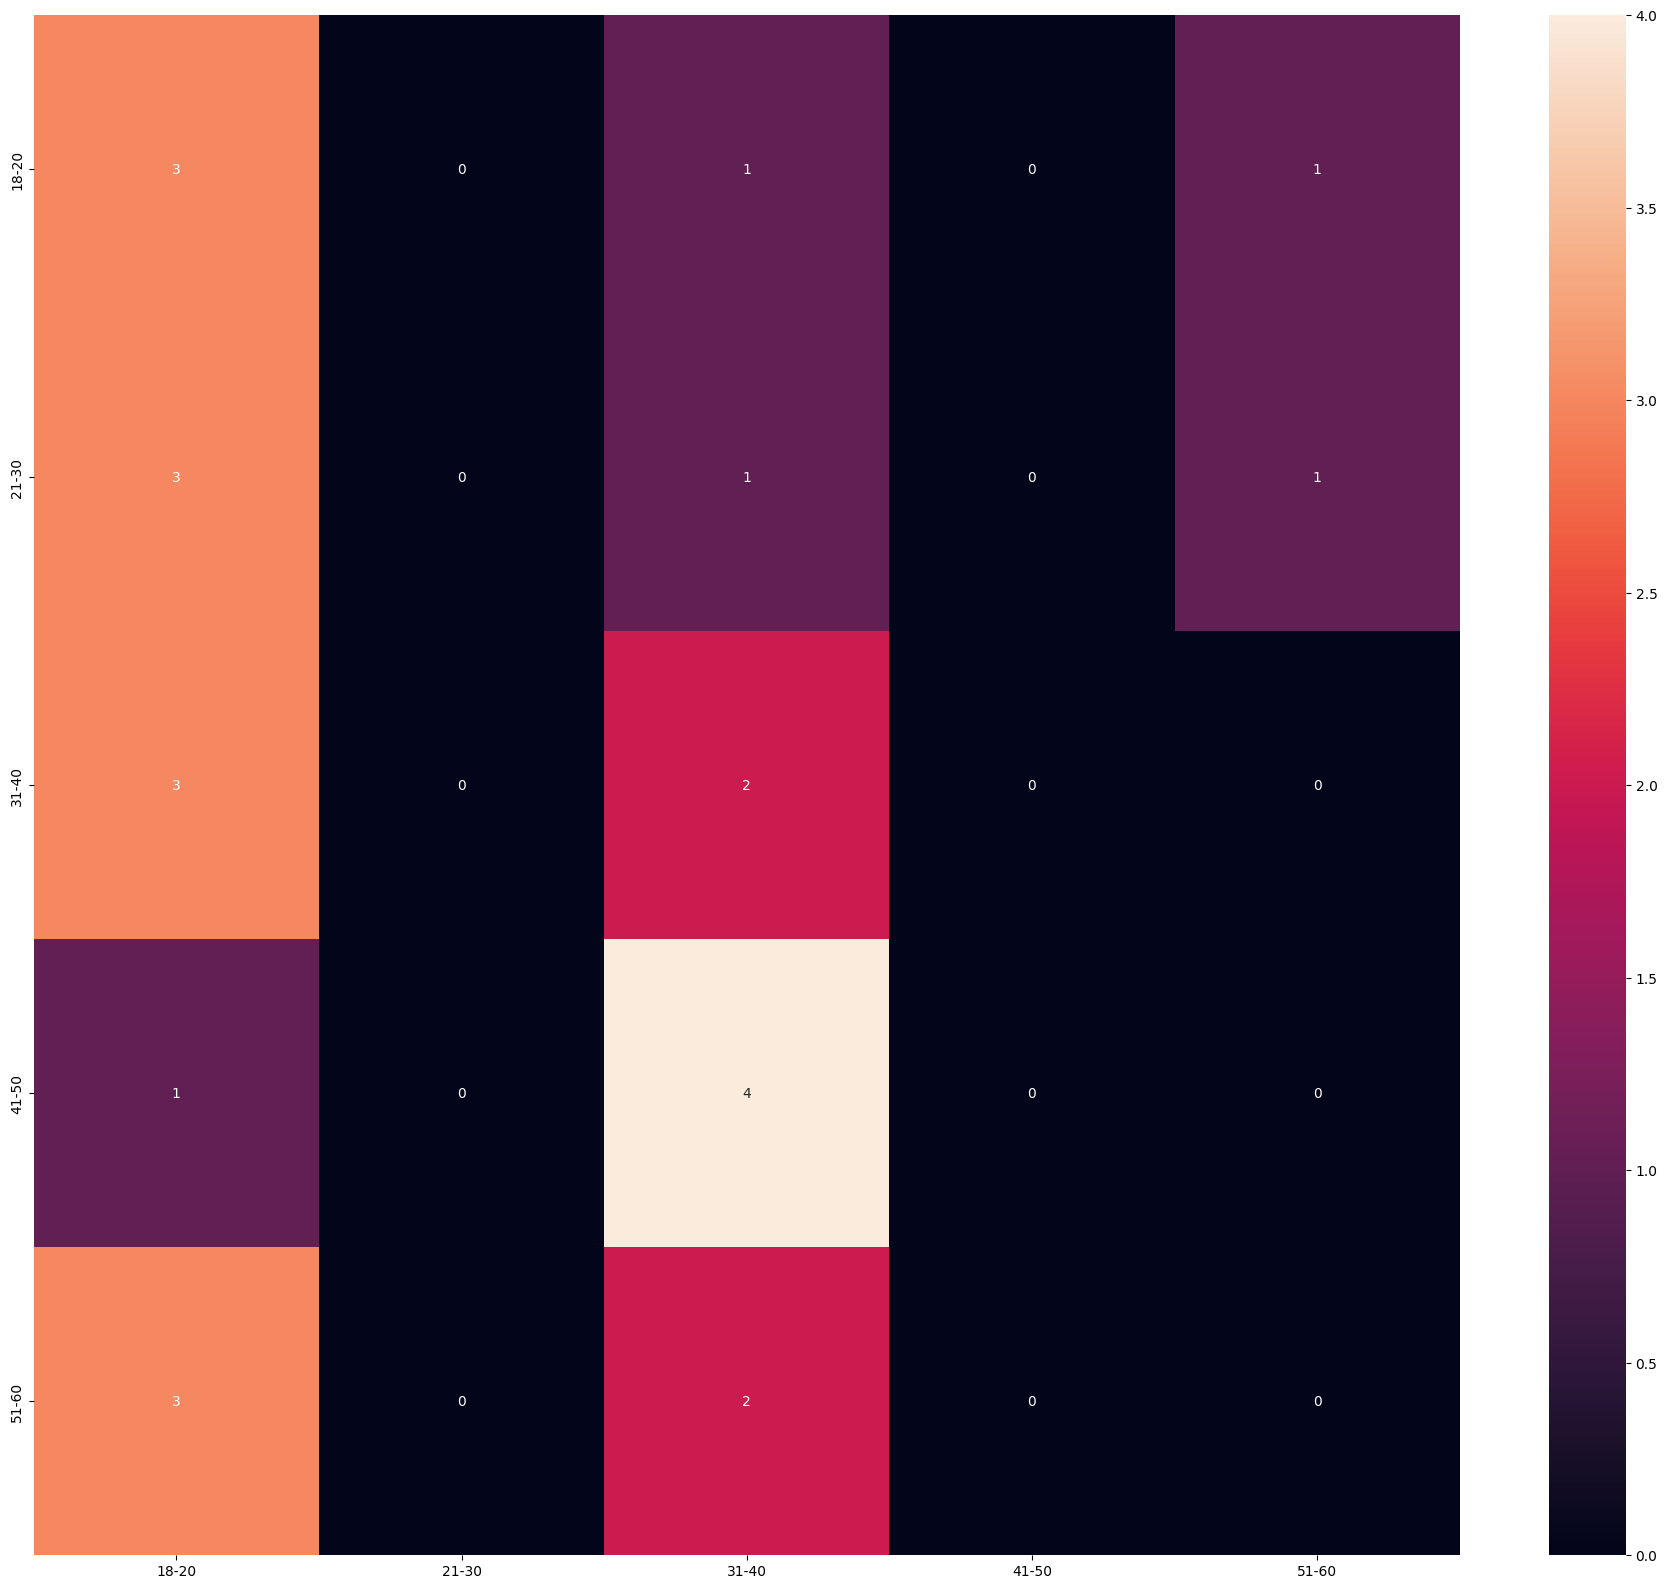

In [ ]:
# Display Confussion Matrix

np.set_printoptions(suppress=True)

plt.figure(figsize=(23, 20))
model_confussionmatrix = confusion_matrix(result_model_pred1['label'], result_model_pred1['y_pred'], labels=result_model_pred1['label'].unique())
sns.heatmap(model_confussionmatrix, annot=True , xticklabels=class_names, yticklabels=class_names)


Jadi, secara keseluruhan, dari code diatas digunakan untuk memvisualisasikan confusion matrix yang membandingkan label sebenarnya dengan prediksi yang dihasilkan oleh sebuah model klasifikasi. Ini membantu untuk melihat di mana model tersebut mungkin melakukan prediksi dengan tepat dan di mana mungkin terjadi kebingungan antara kelas-kelas tertentu.

Berdasarkan matriks konfusi masih terdapat beberapa kesalahan prediksi.

## a. Improvement

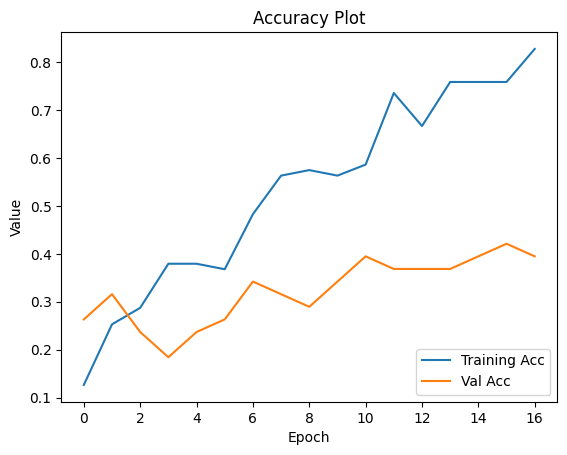

In [ ]:
# plot resullt Imporvement Model
plt.plot(history4.history['accuracy'], label='Training Acc')
plt.plot(history4.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

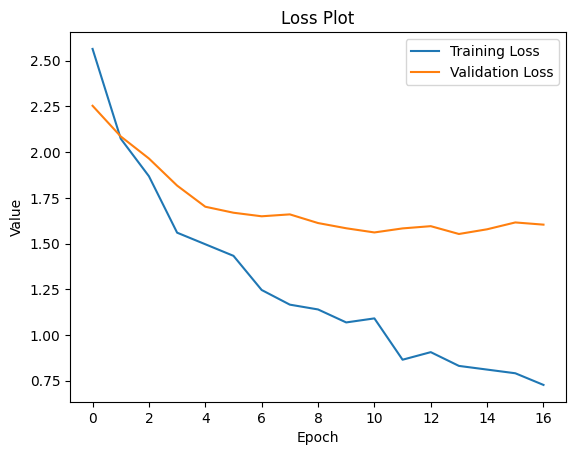

In [ ]:
#loss train & validation
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
# resul Loss and Accuracy
test_results2 = model_tf.evaluate(ds_test, verbose=0)
print(f'Test Loss     : {test_results2[0]:.4f}')
print(f'Test Accuracy : {test_results2[1]:.4f}')

Test Loss     : 2.1907
Test Accuracy : 0.2000


In [ ]:
# predict using Transfer learning model
prediction2 = model_tf.predict(ds_test)

1/1 [==============================] - 3s 3s/step


In [ ]:
y_pred2 = np.argmax(model_tf.predict(ds_test), axis=-1)
y_pred2

1/1 [==============================] - 2s 2s/step


array([1, 3, 1, 2, 1, 1, 1, 2, 1, 0, 3, 1, 4, 4, 1, 0, 2, 0, 1, 4, 1, 3,
       1, 4, 0])

In [ ]:
# change number to string in class
y_pred2=np.array(class_names)[y_pred2]

y_pred2

array(['21-30', '41-50', '21-30', '31-40', '21-30', '21-30', '21-30',
       '31-40', '21-30', '18-20', '41-50', '21-30', '51-60', '51-60',
       '21-30', '18-20', '31-40', '18-20', '21-30', '51-60', '21-30',
       '41-50', '21-30', '51-60', '18-20'], dtype='<U5')

In [ ]:
# create dataframe
pred_result_pred2 = pd.DataFrame(y_pred2, columns=['y_pred_improve'])

pred_result_pred2

y_pred_improve
0           21-30
1           41-50
2           21-30
3           31-40
4           21-30
5           21-30
6           21-30
7           31-40
8           21-30
9           18-20
10          41-50
11          21-30
12          51-60
13          51-60
14          21-30
15          18-20
16          31-40
17          18-20
18          21-30
19          51-60
20          21-30
21          41-50
22          21-30
23          51-60
24          18-20

In [ ]:
# concat test data and result prediction
result_model_pred2 = pd.concat([test_df_reset, pred_result_pred2], axis=1)
result_model_pred2 = result_model_pred2.reset_index(drop=True)
result_model_pred2[['label', 'y_pred_improve']]

label y_pred_improve
0   18-20          21-30
1   21-30          41-50
2   31-40          21-30
3   31-40          31-40
4   18-20          21-30
5   51-60          21-30
6   21-30          21-30
7   41-50          31-40
8   31-40          21-30
9   18-20          18-20
10  51-60          41-50
11  21-30          21-30
12  51-60          51-60
13  41-50          51-60
14  51-60          21-30
15  31-40          18-20
16  41-50          31-40
17  21-30          18-20
18  31-40          21-30
19  21-30          51-60
20  41-50          21-30
21  18-20          41-50
22  51-60          21-30
23  18-20          51-60
24  41-50          18-20

In [ ]:
print('Best Model classification report test : \n',classification_report(result_model_pred2['label'], result_model_pred2['y_pred_improve']))

Best Model classification report test : 
               precision    recall  f1-score   support

       18-20       0.25      0.20      0.22         5
       21-30       0.18      0.40      0.25         5
       31-40       0.33      0.20      0.25         5
       41-50       0.00      0.00      0.00         5
       51-60       0.25      0.20      0.22         5

    accuracy                           0.20        25
   macro avg       0.20      0.20      0.19        25
weighted avg       0.20      0.20      0.19        25



<Axes: >

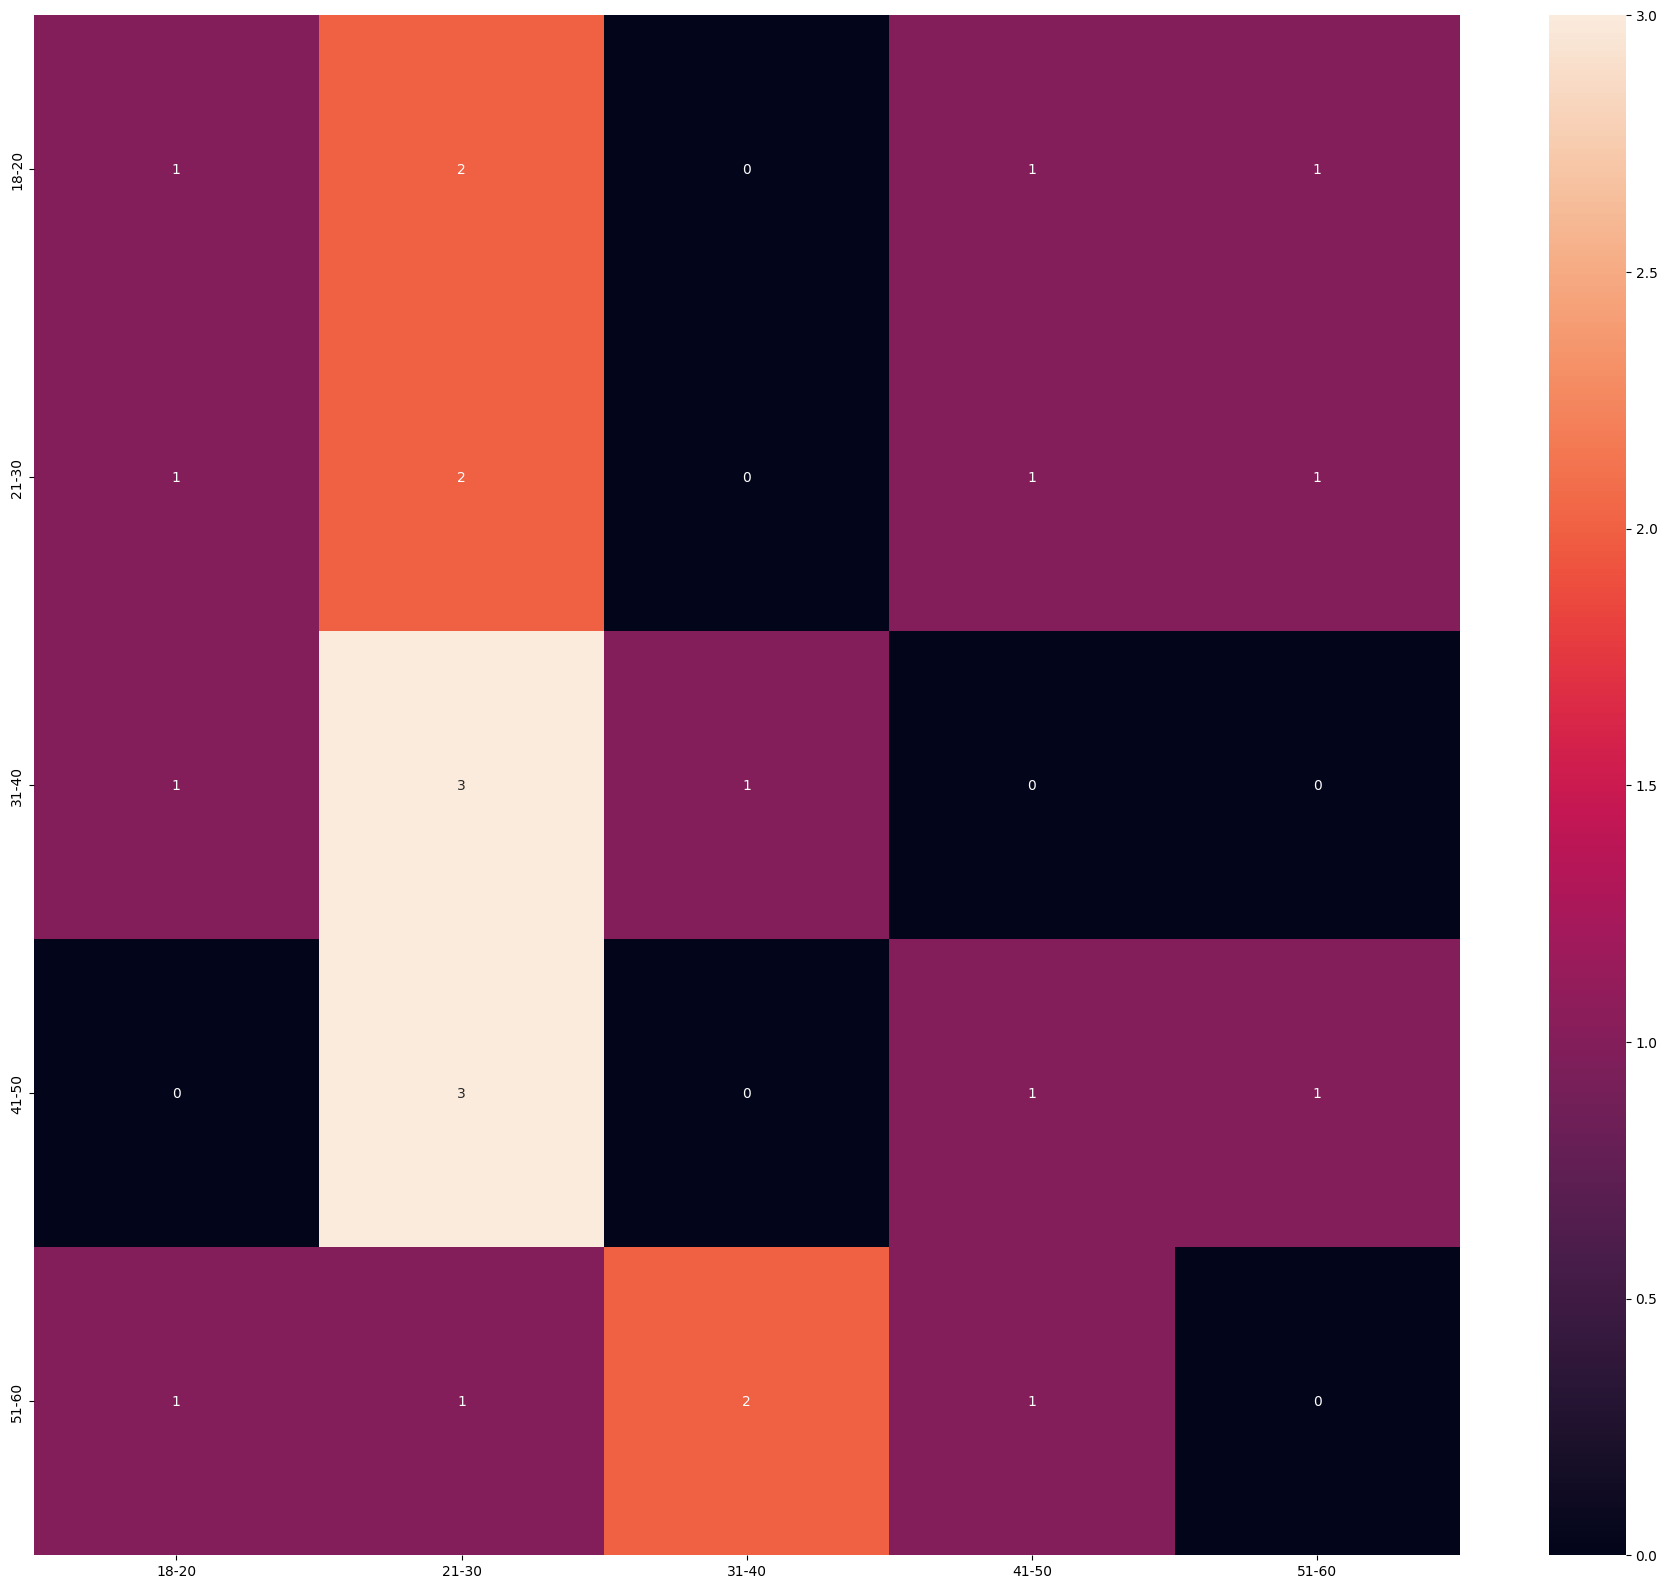

In [ ]:
# Display Confussion Matrix

np.set_printoptions(suppress=True)

plt.figure(figsize=(23, 20))
model_confussionmatrix = confusion_matrix(result_model_pred2['label'], result_model_pred2['y_pred_improve'], labels=result_model_pred2['label'].unique())
sns.heatmap(model_confussionmatrix, annot=True , xticklabels=class_names, yticklabels=class_names)

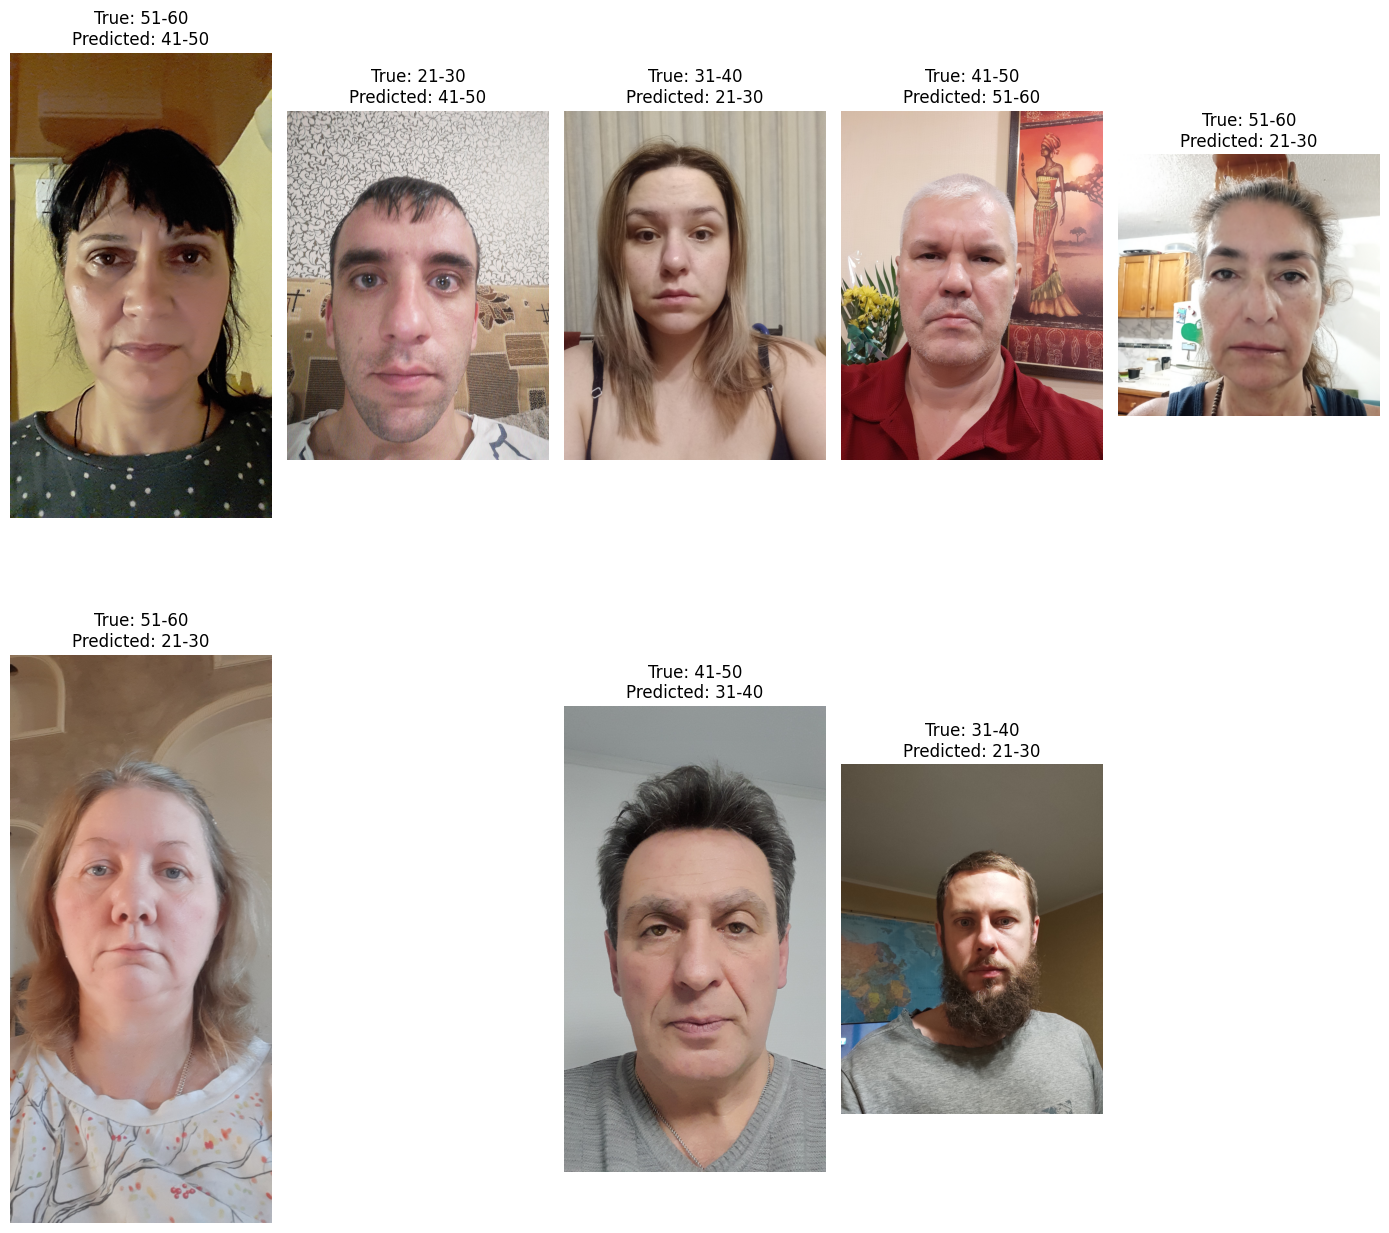

In [ ]:
incorrect_predictions = result_model_pred2[result_model_pred2['label'] != result_model_pred2['y_pred_improve']].head(10)

plt.figure(figsize=(14, 14))
for i, row in incorrect_predictions.iterrows():
    image_path = row[test_df.columns.get_loc('images')]
    true_label = row['label']
    predicted_label = row['y_pred_improve']

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 5, i % 10 + 1)
    plt.imshow(img)
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

Dari hasil yang sudah kita lakukan masih belum baik model dalam memprediksi usia pada wajah seseorang dikarenakan data yang kita punya sangatlah sedikit, perbedaan disetiap classnya pun tidak jauh berbeda, oleh karena itu model pun dalam mempelajarinya sangat sulit memprediksi dengan hasil yang akurat.

---

# ix. Model Saving

 Proses penyimpanan model penting karena melatih model bisa memakan waktu dan sumber daya yang berharga, dan dengan menyimpan model, Anda dapat dengan cepat menerapkannya pada data baru.

In [ ]:
# Freeze Model
model_tf.trainable = False

fungsi freez model yaitu berguna supaya tidak ada parameter yang berubah lagi.

In [ ]:
# Saving model
model_tf.save("best_model.h5")

---

# x. Model Inference

Model inference dibuat di notebook berbeda dengan nama **P2G7_jeni_kasturi_inf.ipynb**

---

# xi. Pengambilan Kesimpulan

Data yang kita teliti berasal dari data set [kaggle]('https://www.kaggle.com/datasets/trainingdatapro/age-detection-human-faces-18-60-years?select=test') dimana data ini terdiri dari 5 jenis class usia, dengan rincian : 
- Terdapat file data train data test
- Memiliki file gambar wajah manusia dengan rentang usia 18-60 tahun.
- Memiliki 150 file gambar
- Dan terdapat 5 class usia yaitu rentang usia 18-20, 21-30, 31-40, 41-50, dan 51-60.

Tujuan akhir dari proyek ini adalah memiliki model yang mampu memprediksi usia dari gambar wajah manusia dengan tingkat akurasi yang tinggi, yang dapat membantu berbagai macam aplikasi di berbagai industri dan platform teknologi.

### Kesimpulan :

- Dari dataset ini kita dapat mengetahui bahwa untuk setiap class/label mempunyai karakteristik yang berbeda misalnya usia 18-20 tidak memiliki banyak keriput dan berbeda dengan usia 51-60 yang cenderung memiliki keriput diseluruh wajahnya. ini juga berlaku untuk setiap label.

- Pada pemodelannya kami menggunakan relu dan softmax sebagai parameter aktivasi. alasan yaitu kami tidak ingin hasilnya negatif dan menggunakan softmax karena kami memiliki target multi-label.

- Untuk perbaikannya kami menggunakan model Xception sebagai transfer learning. alasannya karena model ini lebih efisien untuk model tipe CNN.

- Setelah kita membandingkan model dasar dan model perbaikan, kami memutuskan untuk menggunakan model perbaikan sebagai model terbaik untuk memprediksi meskipun kedua model memiliki skor akurasi yang rendah dan masih kurang sesuai.

### Rekomendasi :
Model ini cocok untuk perusahaan/instansi pembuat aplikasi yang ingin mendeteksi usia seseorang dari wajahnya, selain bisa digunakan untuk mendeteksi usia, ini juga mampu untuk menjaga keamanan dengan mendeteksi wajah seseorang.

### Keterbatasan :
- Pada model ini hasil yang ditampilkan tidak begitu akurat dan diperlukannya untuk mengupdate secara berkala.
- Perbanyak data gambar/foto wajah dari berbagai kalangan usia agar machine learning dapat belajar lebih banyak banyak sehingga bisa menghasilkan hasil yang lebih akurat.

---